Feature Importance Analysis with XGB, SHAP, RFE : Divorce Prediction & Reasons

https://medium.com/@azmine_wasi/divorce-prediction-reasons-feature-importance-analysis-with-xgb-shap-rfe-ba630cb24199

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("../Data/divorce.csv")
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
df.shape

(170, 55)

In [5]:
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [6]:
# sns.set(rc={'figure.figsize':(20,50)})
# for i, column in enumerate(df.columns, 1):
#     plt.subplot(11,5,i)
#     sns.histplot(df[column], color='lightgreen',
#                      kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))# Plot the PDF.
#     data = df[column]
#     mu, std = stats.norm.fit(data)
    
#     xmin, xmax = plt.xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = stats.gamma(df[column])
#     plt.plot(x, p, 'k', linewidth=2)
#     plt.show()


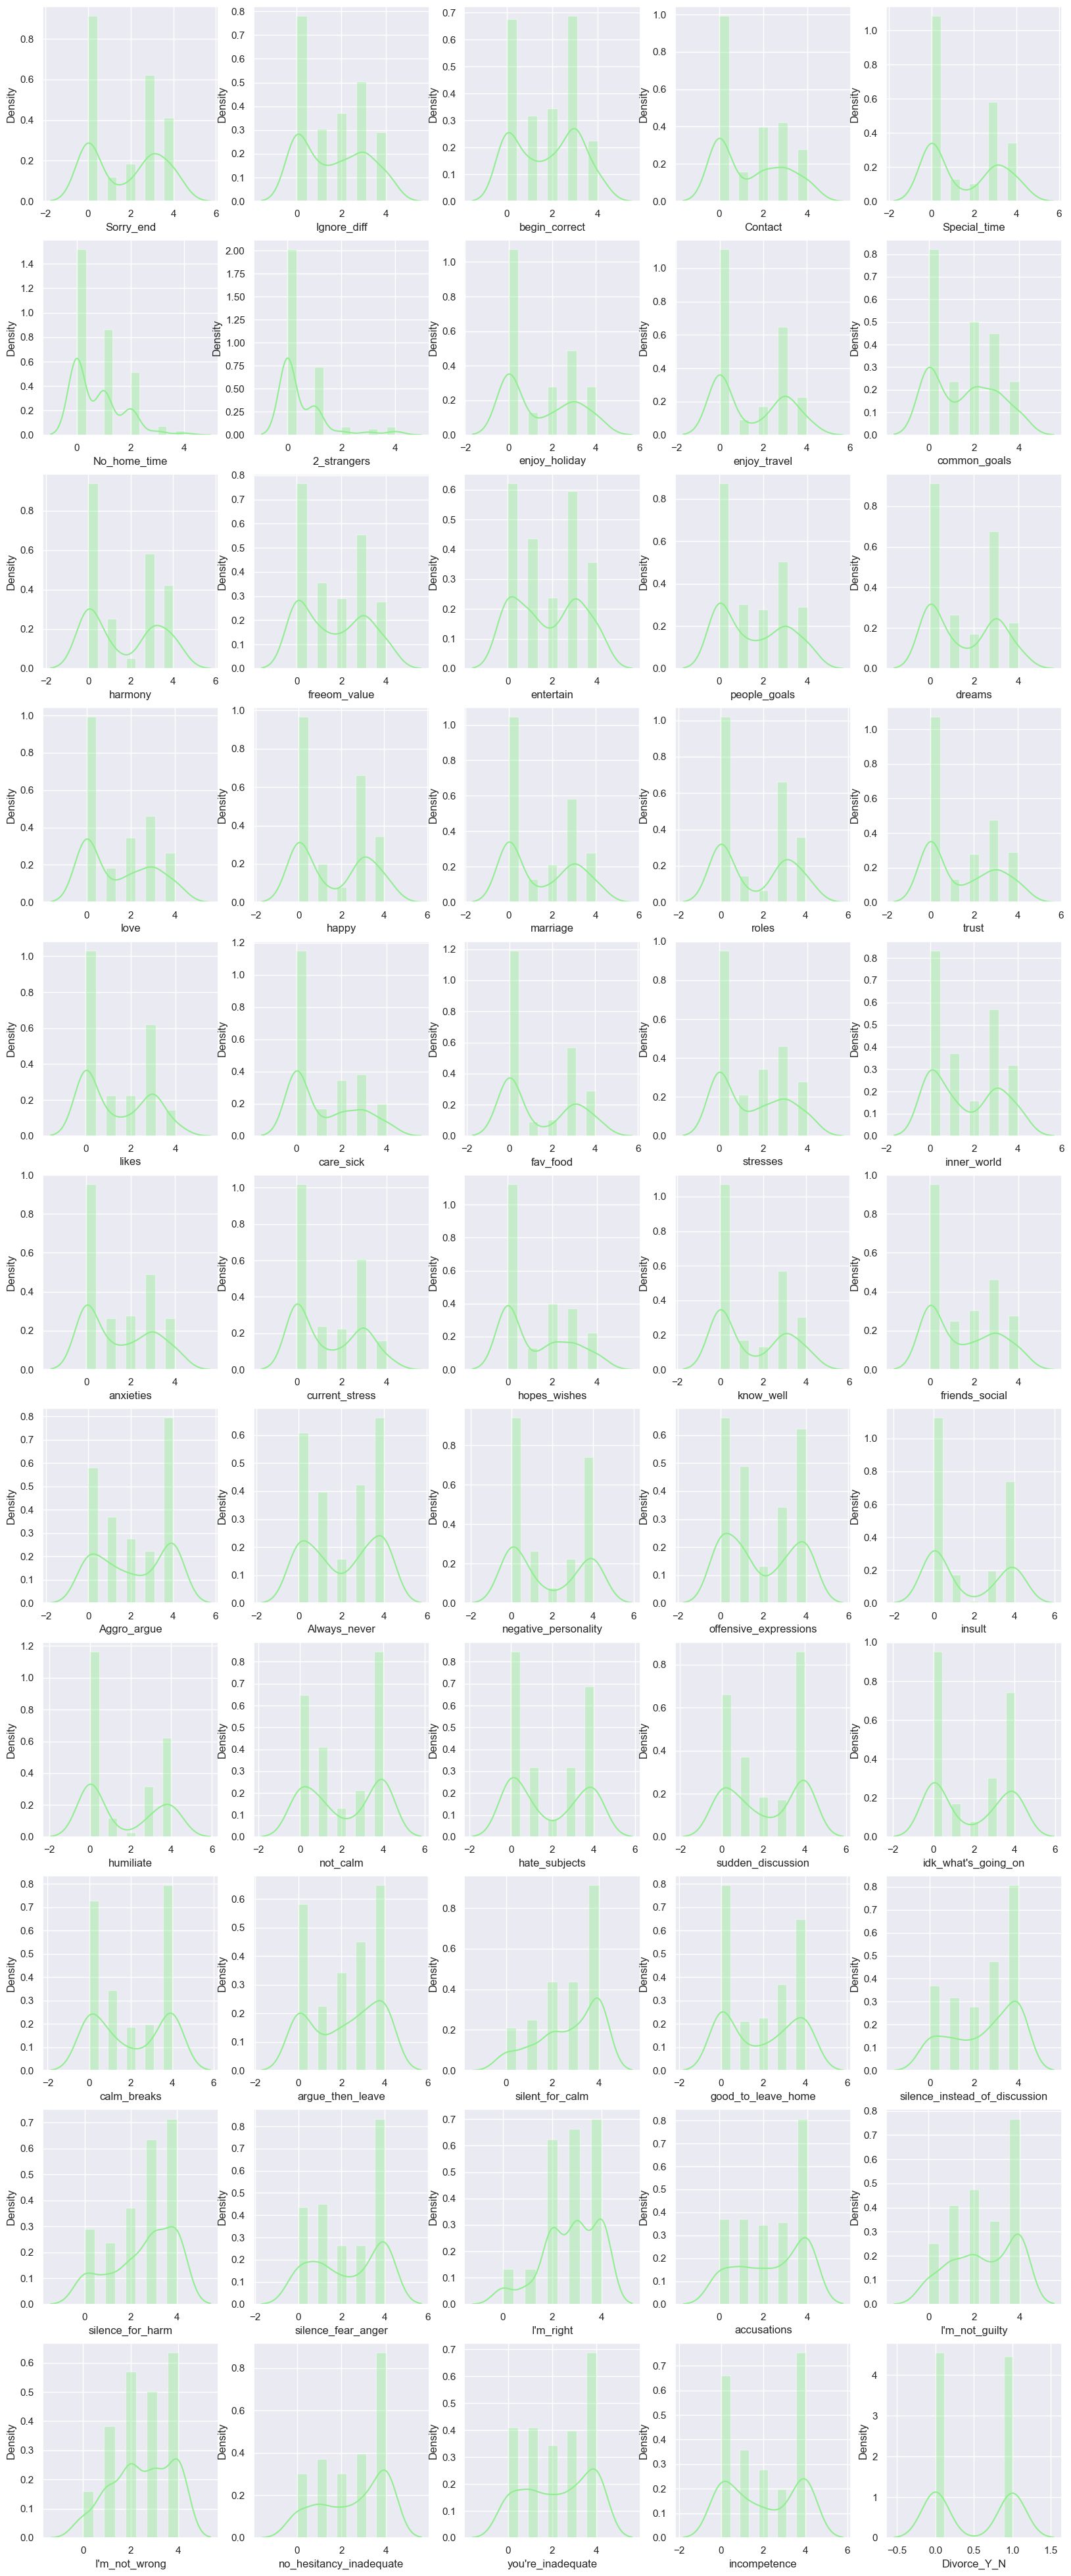

In [7]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(df.columns, 1):
    plt.subplot(11,5,i)
    sns.histplot(df[column], color='lightgreen',
                     kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

In [ ]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(df.columns, 1):
    plt.subplot(11,5,i)
    sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_18284/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_18284/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_18284/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_18284/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_18284/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_18284/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_18284/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_18284/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

In [ ]:
sns.set_theme(rc={'figure.figsize':(20,10)})

In [ ]:
FEATURES_TO_DISPLAY_HEAT_MAP = 11

In [ ]:
for sequence in range(5):
    plt.figure(sequence)
    range_from = sequence * FEATURES_TO_DISPLAY_HEAT_MAP
    range_to = range_from + FEATURES_TO_DISPLAY_HEAT_MAP
    corr = df[df.columns[range_from:range_to]].corr()
    p = sns.heatmap(corr, 
                    xticklabels=corr.columns,
                    yticklabels=corr.columns,
                    cmap="YlGnBu", annot = True)
    p.axes.set_title("\n"+"Features: " + ', '.join(['"' + str(elem) + '"' 
                                                    for elem in 
                                                    df.columns[range_from:range_to]]) + "\n",fontsize=15);

In [ ]:
FEATURES_TO_DISPLAY_LINE_PLOT = 26

In [ ]:
col_names = list(df.columns)
col_names.remove('Divorce_Y_N')

In [ ]:
sns.set_theme(rc={'figure.figsize':(20,50)})

In [ ]:
START_FROM = 1
ROWS = 13
COLUMNS = 2

In [ ]:
for sequence, feature in enumerate(col_names[:FEATURES_TO_DISPLAY_LINE_PLOT], START_FROM):
    x = col_names[sequence + FEATURES_TO_DISPLAY_LINE_PLOT]
    plt.subplot(ROWS, COLUMNS, sequence)
    sns.lineplot(hue='Divorce_Y_N', x=x, y=feature, data=df, color='blue')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree
import xgboost as xgbcx

In [ ]:
X = df[col_names]
y = df['Divorce_Y_N']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3)

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, subsample=0.8, min_child_weight=0.5, max_depth=4, gamma=1,
                    colsample_bytree=0.8, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, random_state=3)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
scores = cross_val_score(xgb, X_train, y_train, cv=5)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb, X_test, y_test, cv=kfold )

In [ ]:
print(f"Mean cross-validation score: {scores.mean():.2f}")
print(f"K-fold CV average score: {kf_cv_scores.mean():.2f}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

In [ ]:
rfe.fit(X_train, y_train)

In [ ]:
acc = roc_auc_score(y_true=y_test, y_score=rfe.predict(X_test))
print(f"{acc:.1%} roc_auc_score on test set.") 

In [ ]:
acc = roc_auc_score(y_true=y_train, y_score=rfe.predict(X_train))
print(f"{acc:.1%} roc_auc_score on train set.") 

In [ ]:
acc = roc_auc_score(y_true=y, y_score=rfe.predict(X))
print(f"{acc:.1%} roc_auc_score on whole set.") 

In [ ]:
data = dict(zip(df.columns, rfe.ranking_))

In [ ]:
data

In [ ]:
rfe_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

In [ ]:
rfe_data

In [ ]:
n = 1
for key, value in rfe_data.items():
    print(key, ' : ', value)
    if n == 15:
        break
        
    n = n + 1

In [ ]:
feature_importance = xgb.get_booster().get_score(importance_type='weight')

In [ ]:
data = pd.DataFrame(data=list(feature_importance.values()), 
                    index=list(feature_importance.keys()), 
                    columns=["score"]).sort_values(by = "score", ascending=False)
data.head(3)

In [ ]:
data.nlargest(15, columns="score").plot(kind='barh', figsize = (15,8),color="green");

In [ ]:
import shap

In [ ]:
explainer   = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(xgbcx.DMatrix(df[col_names]))

In [ ]:
plt.title('\nAverage Feature Contribution using SHAP\n')
shap.summary_plot(shap_values, df[col_names], plot_type="bar", plot_size = (15,10))

In [ ]:
data.index

In [ ]:
data['col_name'] = data.index
tXGB = list(data['col_name'][:5])
print("Top features using XGBoost only :",", ".join(tXGB))

In [ ]:
rf_resultX = pd.DataFrame(shap_values, columns=col_names)
vals = np.abs(rf_resultX.values).mean(0)
shap_importance = pd.DataFrame(list(zip(col_names, vals)), columns=['col_name','score'])
shap_importance.sort_values(by=['score'], ascending=False, inplace=True)
tSHAP = list(shap_importance['col_name'].iloc[:5])
print("Top features using SHAP :", ", ".join(tSHAP))

In [ ]:
tRFE= list(rfe_data.keys())[:6]
print("Top features using RFE :",", ".join(tRFE))

In [ ]:
common = list(set(tSHAP).intersection(set(tXGB)))
common = list(set(common).intersection(set(tRFE)))
print("Top common features using XGBoost and SHAP :",", ".join(common))

In [ ]:
features_full = {"marriage": "My spouse and I have similar ideas about how marriage should be", 
                 "idk_what's_going_on" : "We're just starting a discussion before I know what's going on.",
                 "trust" : "My spouse and I have similar values in trust.",
                 "anxieties" : "I know my spouse's basic anxieties"}
dfx = df.copy()
dfx["Divorce_Y_N"].replace({0: "Divorced", 1: "Not Divorced"}, inplace=True)

In [ ]:
sns.set(rc={'figure.figsize':(24,8)})

In [ ]:
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(common, 1):
    plt.subplot(1,3,i)
    p=sns.histplot(x=column,data=dfx,hue="Divorce_Y_N",stat='count',kde=True,palette='winter')
    p.axes.set_title("\n"+str(features_full[column])+"\n",fontsize=15);

In [ ]:
corr = df[common].corr()
sns.set(rc={'figure.figsize':(10,4)})
p=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="plasma")
p.axes.set_title("\nTop 6 Features Correlation Analysis\n", fontsize=20);